In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from scipy import sparse
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [30]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def log_reg(data):
    
    spam = data[data['CLASS'] == 1].sample(frac=0.8) # first 0.8 SPAM
    ham = data[data['CLASS'] == 0].sample(frac=0.8) # first 0.8 HAM
    
    train = pd.concat([spam,ham])
    x_train = train['CONTENT']
    y_train = train['CLASS']
        
    test = data.drop(train.index.values)
    x_test = test['CONTENT']
    y_test = test['CLASS']
        
    vect_word = TfidfVectorizer()
    
    tr_vect = vect_word.fit_transform(x_train)
    ts_vect = vect_word.transform(x_test)
    
    c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    
    ### L2 MODEL
    
    model_l2 = LogisticRegressionCV(Cs=c_values, penalty='l2', cv=5, solver='liblinear')
    model_l2.fit(tr_vect, y_train)
    
    predictions_l2 = model_l2.predict(tr_vect)
    
    cm_l2 = metrics.confusion_matrix(y_train, predictions_l2)

    TN_l2 = cm_l2[0][0]
    FN_l2 = cm_l2[1][0]
    TP_l2 = cm_l2[1][1]
    FP_l2 = cm_l2[0][1]
    
    #Accuracy
    A_l2 = (TP_l2+TN_l2)/(np.sum(cm_l2))
    # Precision
    P_l2 = TP_l2/(TP_l2+FP_l2)
    # F Score
    F_l2 = f1_score(list(y_train), list(predictions_l2), pos_label = 1)
    # Recall 
    R_l2 = TP_l2/(TP_l2+FN_l2)

    print('L2 Training Set')
    print('Accuracy:', A_l2)
    print('CM:', cm_l2)
    print('Precision', P_l2)
    print('F Score', F_l2)
    print('Recall', R_l2)
    auc_l2 = roc_auc_score(list(y_train), list(predictions_l2))
    print('AUC', auc_l2)

    fpr_l2, tpr_l2, thresholds_l2 = roc_curve(list(y_train), list(predictions_l2))
    plot_roc_curve(fpr_l2, tpr_l2)
    
    model_l2.fit(tr_vect, y_train)
    
    predictions_l2 = model_l2.predict(ts_vect)
    
    cm_l2 = metrics.confusion_matrix(y_test, predictions_l2)

    TN_l2 = cm_l2[0][0]
    FN_l2 = cm_l2[1][0]
    TP_l2 = cm_l2[1][1]
    FP_l2 = cm_l2[0][1]
    
    #Accuracy
    A_l2 = (TP_l2+TN_l2)/(np.sum(cm_l2))
    # Precision
    P_l2 = TP_l2/(TP_l2+FP_l2)
    # F Score
    F_l2 = f1_score(list(y_test), list(predictions_l2), pos_label = 1)
    # Recall 
    R_l2 = TP_l2/(TP_l2+FN_l2)
    
    print('L2 Test Set')
    print('CM:', cm_l2)
    print('Accuracy:', A_l2)
    print('Precision', P_l2)
    print('F Score', F_l2)
    print('Recall', R_l2)
    auc_l2 = roc_auc_score(list(y_test), list(predictions_l2))
    print('AUC', auc_l2)

    fpr_l2, tpr_l2, thresholds_l2 = roc_curve(list(y_test), list(predictions_l2))
    plot_roc_curve(fpr_l2, tpr_l2)
    
    ### L1 MODEL
    
    model_l1= LogisticRegressionCV(Cs=c_values, penalty='l1', cv=5, solver='liblinear')
    model_l1.fit(tr_vect, y_train)
        
    predictions_l1 = model_l1.predict(tr_vect)
    
    cm_l1 = metrics.confusion_matrix(y_train, predictions_l1)

    TN_l1 = cm_l1[0][0]
    FN_l1 = cm_l1[1][0]
    TP_l1 = cm_l1[1][1]
    FP_l1 = cm_l1[0][1]
    
    #Accuracy
    A_l1 = (TP_l1+TN_l1)/(np.sum(cm_l1))
    # Precision
    P_l1 = TP_l1/(TP_l1+FP_l1)
    # F Score
    F_l1 = f1_score(list(y_train), list(predictions_l1), pos_label = 1)
    # Recall 
    R_l1 = TP_l1/(TP_l1+FN_l1)

    print('L1 Training Set')
    print('CM:', cm_l1)
    print('Accuracy:', A_l1)
    print('Precision', P_l1)
    print('F Score', F_l1)
    print('Recall', R_l1)
    auc_l1 = roc_auc_score(list(y_train), list(predictions_l1))
    print('AUC', auc_l1)

    fpr_l1, tpr_l1, thresholds_l1 = roc_curve(list(y_train), list(predictions_l1))
    plot_roc_curve(fpr_l1, tpr_l1)
    
    model_l1.fit(tr_vect, y_train)
    
    predictions_l1 = model_l1.predict(ts_vect)
    
    cm_l1 = metrics.confusion_matrix(y_test, predictions_l1)

    TN_l1 = cm_l1[0][0]
    FN_l1 = cm_l1[1][0]
    TP_l1 = cm_l1[1][1]
    FP_l1 = cm_l1[0][1]
    
    #Accuracy
    A_l1 = (TP_l1+TN_l1)/(np.sum(cm_l1))
    # Precision
    P_l1 = TP_l1/(TP_l1+FP_l1)
    # F Score
    F_l1 = f1_score(list(y_test), list(predictions_l1), pos_label = 1)
    # Recall 
    R_l1 = TP_l1/(TP_l1+FN_l1)

    print('L1 Test Set')
    print('CM:', cm_l1)
    print('Accuracy:', A_l1)
    print('Precision', P_l1)
    print('F Score', F_l1)
    print('Recall', R_l1)
    auc_l1 = roc_auc_score(list(y_test), list(predictions_l1))
    print('AUC', auc_l1)

    fpr_l1, tpr_l1, thresholds_l1 = roc_curve(list(y_test), list(predictions_l1))
    plot_roc_curve(fpr_l1, tpr_l1)
    
    bayes = GaussianNB()

    bayes.fit(tr_vect.toarray(), y_train)
    
    # TRAIN SET

    predictions_tr = bayes.predict(tr_vect.toarray())

    cm_tr = metrics.confusion_matrix(y_train, predictions_tr)

    TN_tr = cm_tr[0][0]
    FN_tr = cm_tr[1][0]
    TP_tr = cm_tr[1][1]
    FP_tr = cm_tr[0][1]
    
    #Accuracy
    A_tr = (TP_tr+TN_tr)/(np.sum(cm_tr))
    # Precision
    P_tr = TP_tr/(TP_tr+FP_tr)
    # F Score
    F_tr = f1_score(list(y_train), list(predictions_tr), pos_label = 1)
    # Recall 
    R_tr = TP_tr/(TP_tr+FN_tr)

    print('NB Training Set')
    print('CM:', cm_tr)
    print('Accuracy:', A_tr)
    print('Precision', P_tr)
    print('F Score', F_tr)
    print('Recall', R_tr)
    auc_tr = roc_auc_score(list(y_train), list(predictions_tr))
    print('AUC', auc_tr)
    
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(list(y_train), list(predictions_tr))
    plot_roc_curve(fpr_tr, tpr_tr)
    
    # TEST SET
    
    predictions_te = bayes.predict(ts_vect.toarray())
    
    cm_te = metrics.confusion_matrix(y_test, predictions_te)

    TN_te = cm_te[0][0]
    FN_te = cm_te[1][0]
    TP_te = cm_te[1][1]
    FP_te = cm_te[0][1]
    
    #Accuracy
    A_te = (TP_te+TN_te)/(np.sum(cm_te))
    # Precision
    P_te = TP_te/(TP_te+FP_te)
    # F Score
    F_te = f1_score(list(y_test), list(predictions_te), pos_label = 1)
    # Recall 
    R_te = TP_te/(TP_te+FN_te)

    print('NB Test Set')
    print('CM:', cm_te)
    print('Accuracy:', A_te)
    print('Precision', P_te)
    print('F Score', F_te)
    print('Recall', R_te)
    auc_te = roc_auc_score(list(y_test), list(predictions_te))
    print('AUC', auc_te)
 
    fpr_te, tpr_te, thresholds_te = roc_curve(list(y_test), list(predictions_te))
    plot_roc_curve(fpr_te, tpr_te)
    
    multiNB = MultinomialNB()
    
    multiNB.fit(tr_vect.toarray(), y_train)
    
    # TRAIN SET

    predictions_mnb = bayes.predict(tr_vect.toarray())

    cm_mnb = metrics.confusion_matrix(y_train, predictions_tr)

    TN_mnb = cm_mnb[0][0]
    FN_mnb = cm_mnb[1][0]
    TP_mnb = cm_mnb[1][1]
    FP_mnb = cm_mnb[0][1]

    #Accuracy
    A_mnb = (TP_mnb+TN_mnb)/(np.sum(cm_mnb))
    # Precision
    P_mnb = TP_mnb/(TP_mnb+FP_mnb)
    # F Score
    F_mnb = f1_score(list(y_train), list(predictions_mnb), pos_label = 1)
    # Recall 
    R_mnb = TP_mnb/(TP_mnb+FN_mnb)

    print('MNB Training Set')
    print('CM:', cm_mnb)
    print('Accuracy', A_mnb)
    print('Precision', P_mnb)
    print('F Score', F_mnb)
    print('Recall', R_mnb)
    auc_mnb = roc_auc_score(list(y_train), list(predictions_mnb))
    print('AUC', auc_mnb)
    
    fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(list(y_train), list(predictions_mnb))
    plot_roc_curve(fpr_mnb, tpr_mnb)
    
    # TEST SET
    
    predictions_mnb = bayes.predict(ts_vect.toarray())
    
    cm_mnb = metrics.confusion_matrix(y_test, predictions_mnb)

    TN_mnb = cm_mnb[0][0]
    FN_mnb = cm_mnb[1][0]
    TP_mnb = cm_mnb[1][1]
    FP_mnb = cm_mnb[0][1]
    
    #Accuracy
    A_mnb = (TP_mnb+TN_mnb)/(np.sum(cm_mnb))
    # Precision
    P_mnb = TP_mnb/(TP_mnb+FP_mnb)
    # F Score
    F_mnb = f1_score(list(y_test), list(predictions_mnb), pos_label = 1)
    # Recall 
    R_mnb = TP_mnb/(TP_mnb+FN_mnb)

    print('MNB Test Set')
    print('CM:', cm_mnb)
    print('Accuracy', A_mnb)
    print('Precision', P_mnb)
    print('F Score', F_mnb)
    print('Recall', R_mnb)
    auc_mnb = roc_auc_score(list(y_test), list(predictions_mnb))
    print('AUC', auc_mnb)
    
    fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(list(y_test), list(predictions_mnb))
    plot_roc_curve(fpr_mnb, tpr_mnb)
    
    df = {'Instance':['NB-Gaussian', 'NB-Multinomial', 'L2', 'L1'], 'Accuracy':[A_te, A_mnb, A_l2, A_l1], 'Precision':[P_te, P_mnb, P_l2, P_l1], 'Recall':[R_te, R_mnb, R_l2, R_l1], 'F1':[F_te, F_mnb, F_l2, F_l1], 'AUC':[auc_te, auc_mnb, auc_l2, auc_l1]}
    return pd.DataFrame(df)


L2 Training Set
Accuracy: 1.0
CM: [[162   0]
 [  0 196]]
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


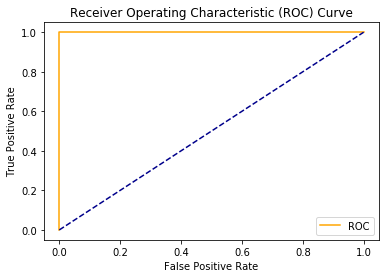

L2 Test Set
CM: [[37  4]
 [ 2 47]]
Accuracy: 0.9333333333333333
Precision 0.9215686274509803
F Score 0.9400000000000001
Recall 0.9591836734693877
AUC 0.9308113489298159


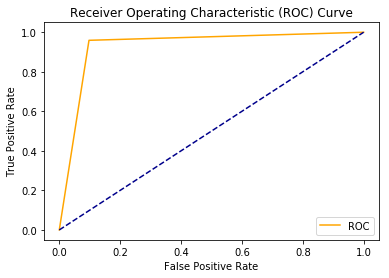

L1 Training Set
CM: [[162   0]
 [  0 196]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


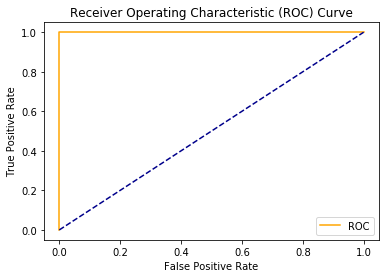

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


L1 Test Set
CM: [[39  2]
 [ 1 48]]
Accuracy: 0.9666666666666667
Precision 0.96
F Score 0.9696969696969697
Recall 0.9795918367346939
AUC 0.9654056744649079


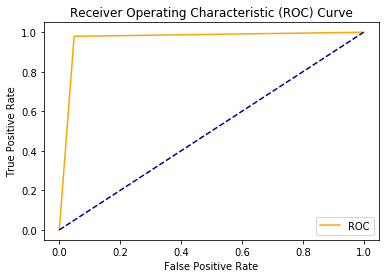

NB Training Set
CM: [[162   0]
 [  1 195]]
Accuracy: 0.9972067039106145
Precision 1.0
F Score 0.9974424552429668
Recall 0.9948979591836735
AUC 0.9974489795918368


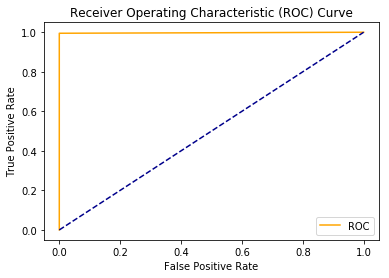

NB Test Set
CM: [[30 11]
 [ 0 49]]
Accuracy: 0.8777777777777778
Precision 0.8166666666666667
F Score 0.8990825688073394
Recall 1.0
AUC 0.8658536585365854


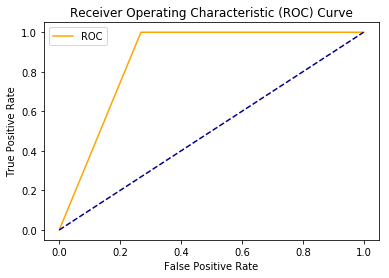

MNB Training Set
CM: [[162   0]
 [  1 195]]
Accuracy 0.9972067039106145
Precision 1.0
F Score 0.9974424552429668
Recall 0.9948979591836735
AUC 0.9974489795918368


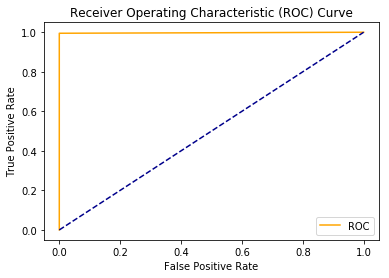

MNB Test Set
CM: [[30 11]
 [ 0 49]]
Accuracy 0.8777777777777778
Precision 0.8166666666666667
F Score 0.8990825688073394
Recall 1.0
AUC 0.8658536585365854


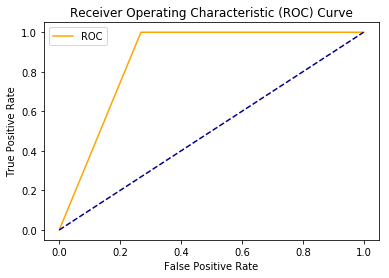

In [40]:
eminem = pd.read_csv('../data/Youtube04-Eminem.csv')
psy = pd.read_csv('../data/Youtube01-Psy.csv')
lmfao = pd.read_csv('../data/Youtube03-LMFAO.csv')
shakira = pd.read_csv('../data/Youtube05-Shakira.csv')
katyperry = pd.read_csv('../data/Youtube02-KatyPerry.csv')



eminem = log_reg(eminem)


In [43]:
print('(d)iii: High precision means less false positives, and high recall means less false negatives. In this case precision is more important because we want to avoid classifying a regular comment as spam by accident.')

print('Eminem\n', eminem)

(d)iii: High precision means less false positives, and high recall means less false negatives. In this case precision is more important because we want to avoid classifying a regular comment as spam by accident.
Eminem
          Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.877778   0.816667  1.000000  0.899083  0.865854
1  NB-Multinomial  0.877778   0.816667  1.000000  0.899083  0.865854
2              L2  0.933333   0.921569  0.959184  0.940000  0.930811
3              L1  0.966667   0.960000  0.979592  0.969697  0.965406


L2 Training Set
Accuracy: 1.0
CM: [[140   0]
 [  0 140]]
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


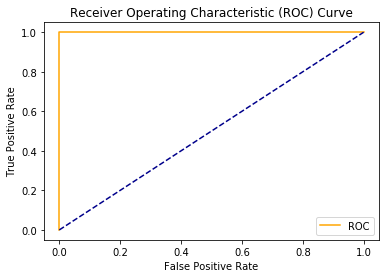

L2 Test Set
CM: [[35  0]
 [ 2 33]]
Accuracy: 0.9714285714285714
Precision 1.0
F Score 0.9705882352941176
Recall 0.9428571428571428
AUC 0.9714285714285714


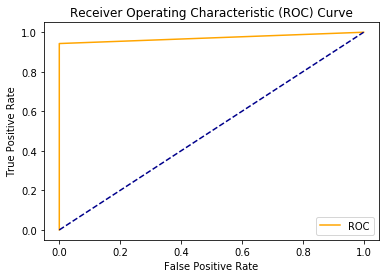

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


L1 Training Set
CM: [[140   0]
 [  0 140]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


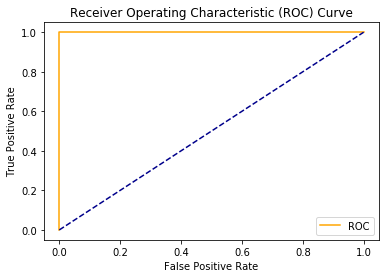

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


L1 Test Set
CM: [[33  2]
 [ 3 32]]
Accuracy: 0.9285714285714286
Precision 0.9411764705882353
F Score 0.9275362318840579
Recall 0.9142857142857143
AUC 0.9285714285714285


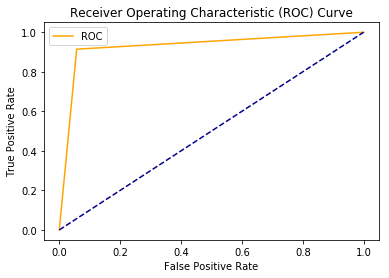

NB Training Set
CM: [[140   0]
 [  1 139]]
Accuracy: 0.9964285714285714
Precision 1.0
F Score 0.996415770609319
Recall 0.9928571428571429
AUC 0.9964285714285714


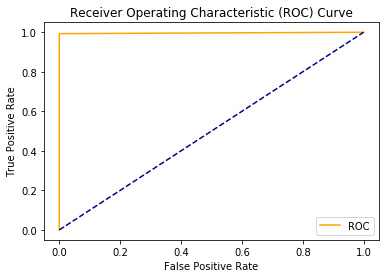

NB Test Set
CM: [[30  5]
 [ 5 30]]
Accuracy: 0.8571428571428571
Precision 0.8571428571428571
F Score 0.8571428571428571
Recall 0.8571428571428571
AUC 0.8571428571428572


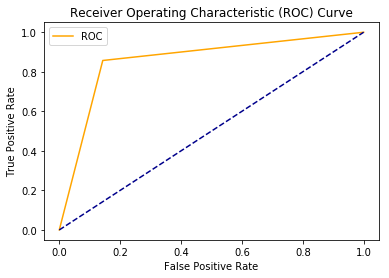

MNB Training Set
CM: [[140   0]
 [  1 139]]
Accuracy 0.9964285714285714
Precision 1.0
F Score 0.996415770609319
Recall 0.9928571428571429
AUC 0.9964285714285714


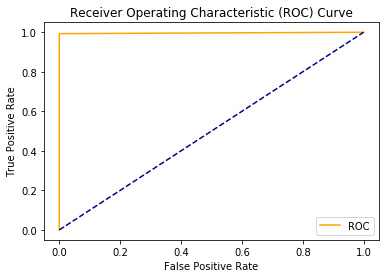

MNB Test Set
CM: [[30  5]
 [ 5 30]]
Accuracy 0.8571428571428571
Precision 0.8571428571428571
F Score 0.8571428571428571
Recall 0.8571428571428571
AUC 0.8571428571428572


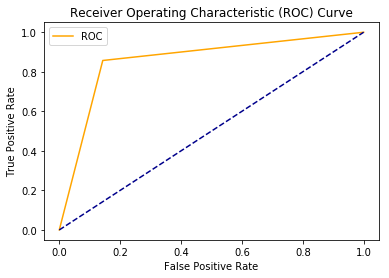

L2 Training Set
Accuracy: 1.0
CM: [[162   0]
 [  0 189]]
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


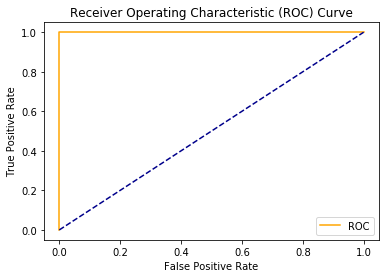

L2 Test Set
CM: [[40  0]
 [ 2 45]]
Accuracy: 0.9770114942528736
Precision 1.0
F Score 0.9782608695652174
Recall 0.9574468085106383
AUC 0.9787234042553192


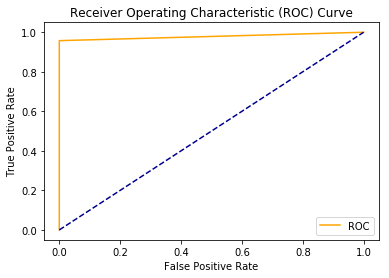

L1 Training Set
CM: [[162   0]
 [  0 189]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


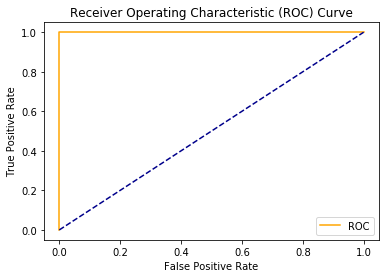

L1 Test Set
CM: [[39  1]
 [ 3 44]]
Accuracy: 0.9540229885057471
Precision 0.9777777777777777
F Score 0.9565217391304347
Recall 0.9361702127659575
AUC 0.9555851063829787


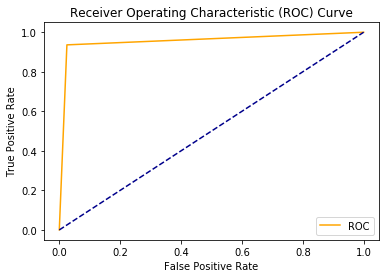

NB Training Set
CM: [[162   0]
 [  0 189]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


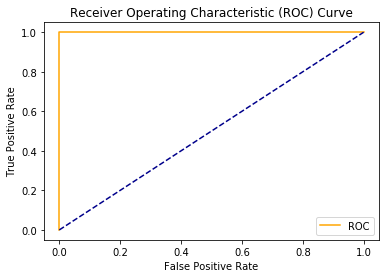

NB Test Set
CM: [[35  5]
 [ 4 43]]
Accuracy: 0.896551724137931
Precision 0.8958333333333334
F Score 0.9052631578947369
Recall 0.9148936170212766
AUC 0.8949468085106382


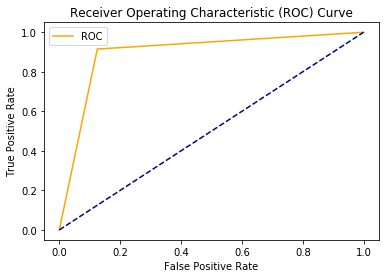

MNB Training Set
CM: [[162   0]
 [  0 189]]
Accuracy 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


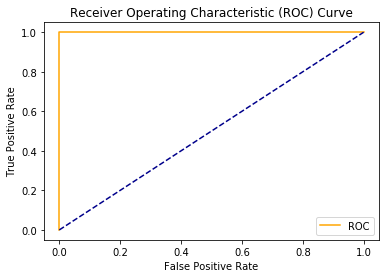

MNB Test Set
CM: [[35  5]
 [ 4 43]]
Accuracy 0.896551724137931
Precision 0.8958333333333334
F Score 0.9052631578947369
Recall 0.9148936170212766
AUC 0.8949468085106382


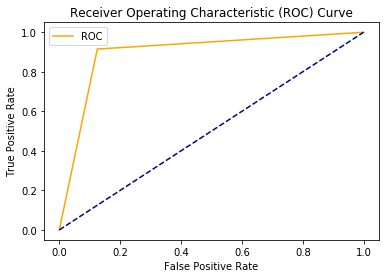

L2 Training Set
Accuracy: 1.0
CM: [[157   0]
 [  0 139]]
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


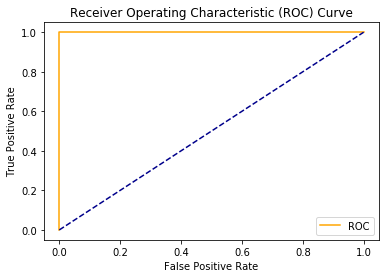

L2 Test Set
CM: [[37  2]
 [ 2 33]]
Accuracy: 0.9459459459459459
Precision 0.9428571428571428
F Score 0.9428571428571428
Recall 0.9428571428571428
AUC 0.9457875457875458


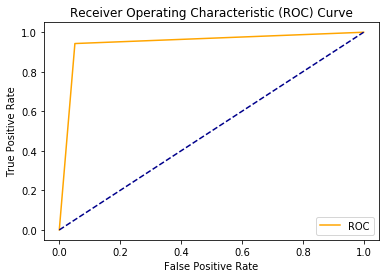

L1 Training Set
CM: [[157   0]
 [  0 139]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


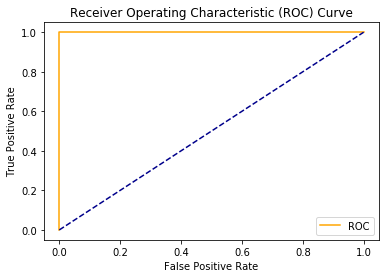

L1 Test Set
CM: [[39  0]
 [ 3 32]]
Accuracy: 0.9594594594594594
Precision 1.0
F Score 0.955223880597015
Recall 0.9142857142857143
AUC 0.9571428571428571


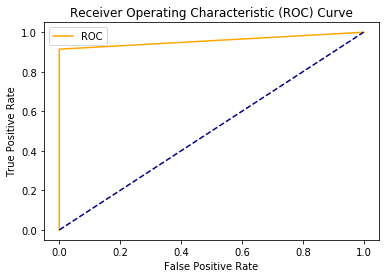

NB Training Set
CM: [[157   0]
 [  0 139]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


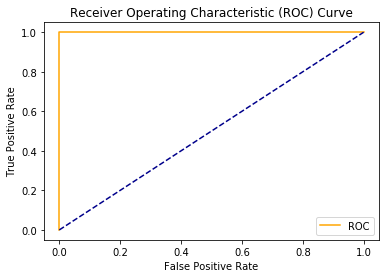

NB Test Set
CM: [[33  6]
 [ 2 33]]
Accuracy: 0.8918918918918919
Precision 0.8461538461538461
F Score 0.8918918918918919
Recall 0.9428571428571428
AUC 0.8945054945054944


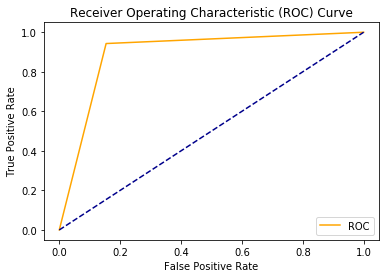

MNB Training Set
CM: [[157   0]
 [  0 139]]
Accuracy 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


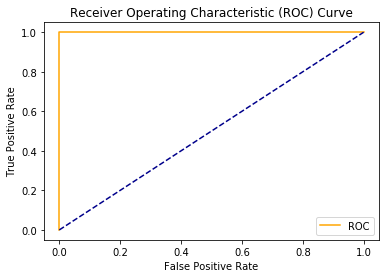

MNB Test Set
CM: [[33  6]
 [ 2 33]]
Accuracy 0.8918918918918919
Precision 0.8461538461538461
F Score 0.8918918918918919
Recall 0.9428571428571428
AUC 0.8945054945054944


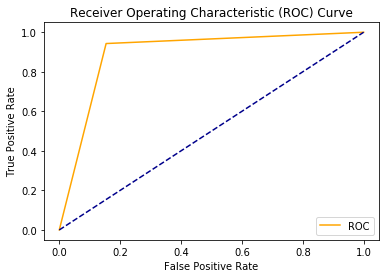

L2 Training Set
Accuracy: 0.9678571428571429
CM: [[138   2]
 [  7 133]]
Precision 0.9851851851851852
F Score 0.9672727272727272
Recall 0.95
AUC 0.9678571428571429


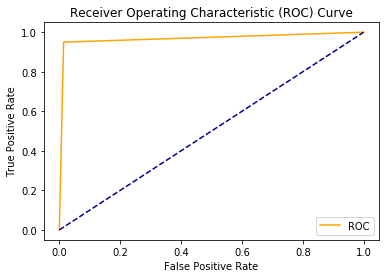

L2 Test Set
CM: [[33  2]
 [ 6 29]]
Accuracy: 0.8857142857142857
Precision 0.9354838709677419
F Score 0.8787878787878788
Recall 0.8285714285714286
AUC 0.8857142857142857


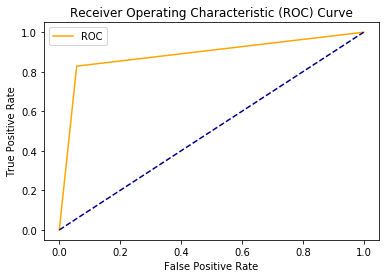

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


L1 Training Set
CM: [[140   0]
 [  0 140]]
Accuracy: 1.0
Precision 1.0
F Score 1.0
Recall 1.0
AUC 1.0


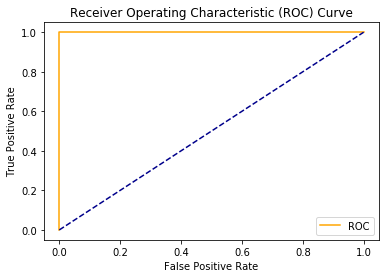

L1 Test Set
CM: [[34  1]
 [ 3 32]]
Accuracy: 0.9428571428571428
Precision 0.9696969696969697
F Score 0.9411764705882354
Recall 0.9142857142857143
AUC 0.9428571428571428


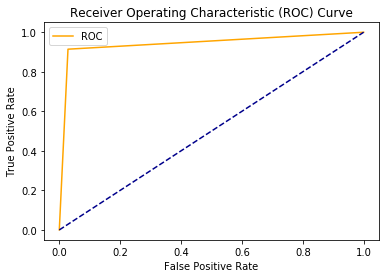

NB Training Set
CM: [[140   0]
 [  2 138]]
Accuracy: 0.9928571428571429
Precision 1.0
F Score 0.9928057553956835
Recall 0.9857142857142858
AUC 0.9928571428571429


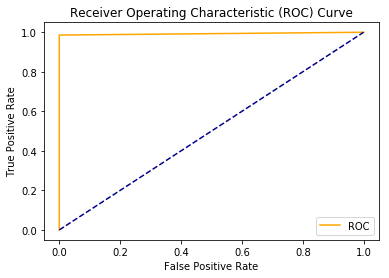

NB Test Set
CM: [[27  8]
 [ 3 32]]
Accuracy: 0.8428571428571429
Precision 0.8
F Score 0.8533333333333333
Recall 0.9142857142857143
AUC 0.8428571428571429


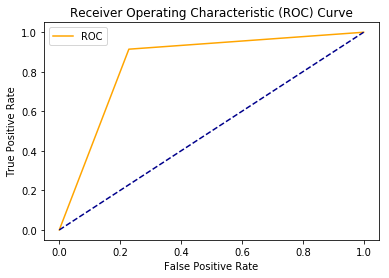

MNB Training Set
CM: [[140   0]
 [  2 138]]
Accuracy 0.9928571428571429
Precision 1.0
F Score 0.9928057553956835
Recall 0.9857142857142858
AUC 0.9928571428571429


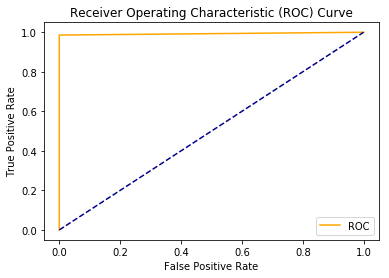

MNB Test Set
CM: [[27  8]
 [ 3 32]]
Accuracy 0.8428571428571429
Precision 0.8
F Score 0.8533333333333333
Recall 0.9142857142857143
AUC 0.8428571428571429


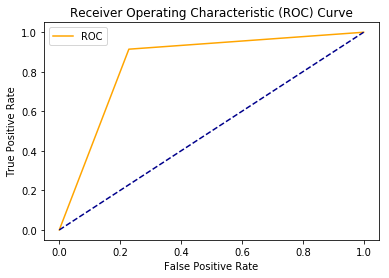

In [41]:
psy = log_reg(psy)
lmfao = log_reg(lmfao)
shakira = log_reg(shakira)
katyperry = log_reg(katyperry)

In [42]:
print('Psy\n', psy)

print('LMFAO\n', lmfao)

print('Shakira\n', shakira)

print('Katy Perry\n', katyperry)

Psy
          Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.857143   0.857143  0.857143  0.857143  0.857143
1  NB-Multinomial  0.857143   0.857143  0.857143  0.857143  0.857143
2              L2  0.971429   1.000000  0.942857  0.970588  0.971429
3              L1  0.928571   0.941176  0.914286  0.927536  0.928571
LMFAO
          Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.896552   0.895833  0.914894  0.905263  0.894947
1  NB-Multinomial  0.896552   0.895833  0.914894  0.905263  0.894947
2              L2  0.977011   1.000000  0.957447  0.978261  0.978723
3              L1  0.954023   0.977778  0.936170  0.956522  0.955585
Shakira
          Instance  Accuracy  Precision    Recall        F1       AUC
0     NB-Gaussian  0.891892   0.846154  0.942857  0.891892  0.894505
1  NB-Multinomial  0.891892   0.846154  0.942857  0.891892  0.894505
2              L2  0.945946   0.942857  0.942857  0.942857  0.945788
3            